<a href="https://colab.research.google.com/github/TaeYongGong/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1

1

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter
# dir(ipd)
# dir(lfilter)

# **수학개념**

## **복소수**
- $a$(실수)+$bi$(허수)
- 실수 x축과 허수 y축으로 되어있는 복소평면 위의 한점으로 나타낼 수 있음
### 기본성질
  - 복소수 덧셈은 **화살표 이어 붙이기**이다. 
    - 두개의 벡터값으로 생각하면 된다. 
  - 복소수 값에 $i$를 곱하면 복소평면 상에서 왼쪽으로  $90\,^{\circ}$  회전, $i^2$을 곱하면 왼쪽으로  $180\,^{\circ}$  회전
    - $ (a+bi)i = ai+-b $ 
      - 기울기 : $ \frac{b}{a} => -\frac{a}{b} $
      - 두 개의 곱은 '-1'이다.
    - $-i$는 오른쪽  $90\,^{\circ}$ , $(-i)^2\$은 오른쪽으로  $180\,^{\circ}$ 



## **미분방정식**
*기울기와 함수값이 같다*

$ f^{\prime}(x)=1*f(x)$


$ \begin{array}{l}
f(x+\Delta x)=(1+\Delta x) f(x) \\
f(\Delta x)=(1+\Delta x) \\
f(2 \Delta x)=(1+\Delta x)^{2} \\
f(3 \Delta x)=(1+\Delta x)^{3} \\
\vdots \\
f(n \Delta x)=(1+\Delta x) f((n-1) \Delta x)
=(1+\Delta x)^n
\end{array} $


*등비수열의 형태*

$ \begin{array}{l}
f(x)=\lim _{n \rightarrow \infty}\left(1+\frac{x}{n}\right)^{n} = e^x\\
f(1)=\lim _{n \rightarrow \infty}\left(1+\frac{1}{n}\right)^{n} = 2.718... = e
\end{array} $ 

$f^{\prime}(x)=1*f(x) = e^x$


## **자연상수**
위에서 유도된 상수
-  $\lim_{dt\to0} \frac {e^{dt} - 1}{dt} = 1$을 만족하는 수 
- 비례상수(증가율)가 1인 밑 -> 미분방정식이 자신인 함수
- $e = lim_{n\to\infty}(1+ \frac {1}{n})^n
= lim_{n\to0}(1+ x)^\frac {1}{x}$
- 따라서 $e^{i} = lim_{n\to\infty}(1+ \frac {i}{n})^n$
  - cf) 자연로그는 $e^{ln(n)} = n$(n이 자연수일때)

이는 그래프 상으로 지수함수의 형태가 된다. 

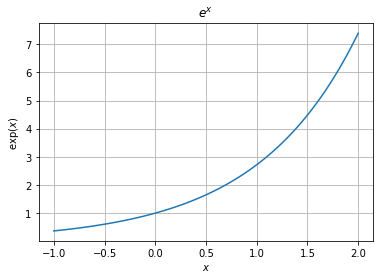

In [ ]:
x = np.linspace(-1, 2, 100)
y = np.exp(x)

plt.plot(x, y)
plt.title('$e^x$')
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.grid(True)
plt.show()

## **$e^{\pi\ i } + 1 = 0$** 유도


$f^{\prime}(x)=i \times f(x)$

$e^{i x}=\lim _{n \rightarrow \infty}\left(1+\frac{i x}{n}\right)^{n}$

if $ x = 1 $

$e^i = \lim _{n \rightarrow \infty}\left(1+\frac{i}{n}\right)^{n} $


**$ e^i = a + bi$**이다.

따라서, 위 두 식을 통해서 x좌표에 따라 ploting되는 2개의 실수축과 하나의 허수축으로 이루어진 3차원 그래프를 생각해 볼 수 있다. 

이를 3차원 그래프상에서 생각해보면 

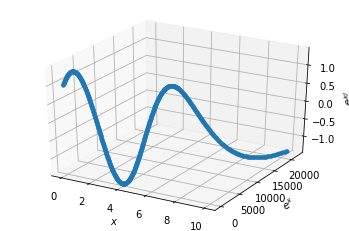

In [ ]:
x = np.linspace(0,100,10000)
y = [np.exp(b) for b in x]
z = [np.exp(b*1j).real + np.exp(b*1j).imag for b in x]

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(x[0:1000], y[0:1000], z[0:1000], '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$ e^x $')
ax.set_zlabel('$e^{xi} $')
ax.grid()

또한, 이를 복소평면상에서 보면

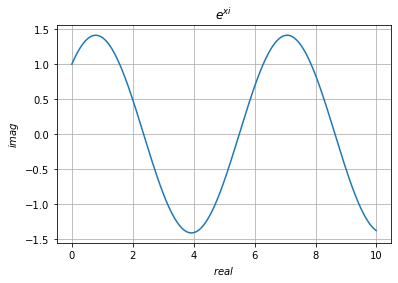

In [ ]:
plt.plot(x[0:1000], z[0:1000])
plt.title('$e^{xi}$')
plt.xlabel('$real$')
plt.ylabel('$imag$')
plt.grid(True)
plt.show()

이 그래프가 어떻게 도출되는 지 미분방정식을 이용하여 살펴보면 

새로운 미분 방정식 : 

$ f(x+\Delta x)=f(x)+i f(x) \Delta x $ 

$ f^{\prime}(x) = i f(x) $

여기에 $ f(x) = e^{ix} $을 대입하면
$ f(x+\Delta x)= e^{ix} +i e^{ix} \Delta x $

$ e^{i(x+\Delta x)}=e^{i x}+i e^{i x} \Delta x $ 


이를 복소수의 기본성질을 통해 이해한다면

위의 식은 복소평면상 $e^{ix}$ 벡터와 $ie^{ix} \Delta x $의 합으로 볼 수 있다.

임의의 복소수에 어떤 실수를 곱해주는 것은 그 복소수가 그 방향 그대로 늘어나거나 줄어드는 것을 의미하는데 
$ e^{i x} \Delta x $는 $e^{ix}$ 벡터가 방향은 유지한채 $ \Delta x$ 만큼 줄어드는 것을 뜻한다. 

이에 허수 $i$를 곱하면 크기는 그대로 유지한채 방향만 $90\,^{\circ}$ 방향으로 돌아간다. 

이를 e^{i x} 벡터에 더해주면 기본성질에 의해 복소평면상에서 화살표 이어주기가 된다. 


 




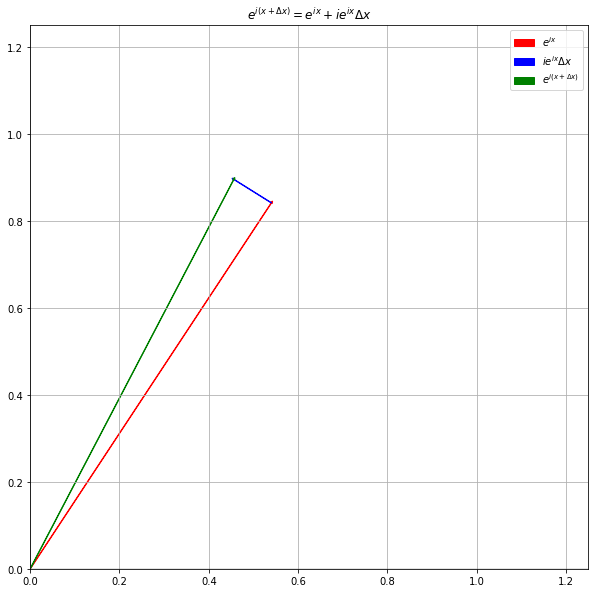

In [ ]:
a = np.exp(1*1j)
b = 1j*np.exp(1*1j)*0.1
c = a+b
plt.figure(figsize=(10,10))
plt.xlim(0,1.25)
plt.ylim(0,1.25)

a1 = plt.arrow(0, 0, a.real, a.imag, head_width = .005, head_length = .005, color = 'red',label="$e^{i x}$")
a2 = plt.arrow(a.real, a.imag, b.real, b.imag, head_width = .005, head_length = .005, color = 'blue',label="$i e^{i x} \Delta x $")
a3 = plt.arrow(0, 0, c.real, c.imag, head_width = .005, head_length = .005, color = 'green',label="$ e^{i(x+\Delta x)}$")

plt.axhline(0, color='gray', alpha = 0.3)
plt.axvline(0, color='gray', alpha = 0.3)
plt.title("$ e^{i(x+\Delta x)}=e^{i x}+i e^{i x} \Delta x $")
plt.legend([a1,a2,a3,],["$e^{i x}$","$i e^{i x} \Delta x $","$ e^{i(x+\Delta x)}$",])
plt.grid()
plt.show()

대략 표현해주면 $ e^{i(x+\Delta x)}$ 라는 벡터와 그 아래에 $e^{i x}$ 라는 벡터가 있는 데 그 사이에 $i e^{i x} \Delta x$ 벡터가 존재하고 이는 직삼각형을 이룬다.

그리고 $\Delta x$의 값이 한없이 작아진다고 할때 두 벡터는 구분할 수 없게된다.

$x=0$일때 

$i = 1$ 복소평면상 원점에서부터 1만큼 떨어져 있기때문에 

$e^{i(\Delta x)}=1+i \Delta x(=\Delta x)$

그리고 $\Delta x$는 0에 한없이 가까워지기 때문에

결국

$e^{i(\Delta x)} = 1$이 된다. 


$ x = \Delta x$ 일때 

$ e^{i 2 \Delta x}=e^{i \Delta x}+i e^{i \Delta x} \Delta x$

이를 보면 $x$가 $\Delta x$ 만큼 커지면 복소수는 원래방향에서 수직으로 꺽어 $\Delta x$ 만큼 간곳에 위치하게 된다. 



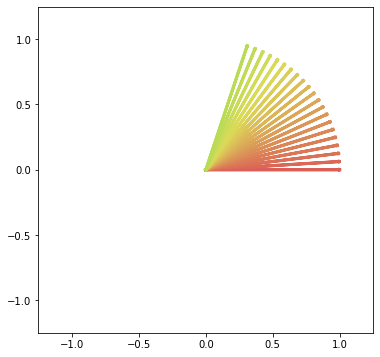

In [ ]:
import numpy as np
import pylab as plt
import itertools
import seaborn as sns

n = 100
colors = sns.color_palette("hls", n)
roots = np.roots( [1,] + [0,]*(n-1) + [-1,] )

idx = np.argsort([np.angle(x) for x in roots])
roots = roots[idx]

plt.figure(figsize=(6,6))

for root,c in zip(roots[49:70],colors):
    plt.arrow(0,0,root.real,root.imag,ec=c,lw=3)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.show()

따라서, n번이동하면  $ e^{i n \Delta x}$에 위치하게되고 이 값은 $n \Delta x$ 형성한 곡선의 길이를 뜻한다. 



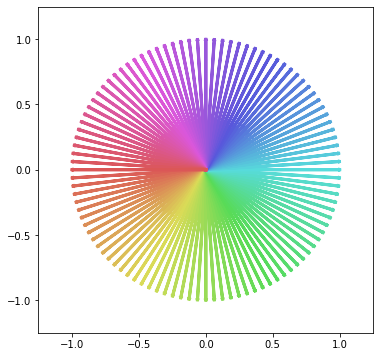

In [ ]:
import numpy as np
import pylab as plt
import itertools
import seaborn as sns

n = 100
colors = sns.color_palette("hls", n)
roots = np.roots( [1,] + [0,]*(n-1) + [-1,] )

idx = np.argsort([np.angle(x) for x in roots])
roots = roots[idx]

plt.figure(figsize=(6,6))

for root,c in zip(roots,colors):
    plt.arrow(0,0,root.real,root.imag,ec=c,lw=3)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.show()

이를 $x$라는 하나의 문자로 둔다면 $e^{ix}$는 곡선을 형성하면서 움직이는 복소평면상의 점이되고 이 곡선은 $r = 1$인 원의 일부이다. 

즉, 복소평면상 단위원의 일부이다.

왜나면 $\Delta x$만큼 떨어진 선분을 연장한 것이 그 지점에서의 접선이고 $e^{ix}$는 $\Delta x$만큼 이동할때마다 허수 $i$를 곱해줌으로서 반비름과 접선의 각도 항상 수직으로 맞춰주고 있던 것이다. 

이러한 특성을 가진 도형이 원이고 결국 $e^{ix}$는 복소평면상 단위원을 그리는 함수가 되는 것이다. 

또한 $e^{ix}$에서 $x(=n \Delta x)$가 나타내었던 길이는 반지름이 1인 원의 길이이자 실수축과 이루는 각도이다. 

따라서, $x = \pi$일때의 위치는 실수 1일때와는 정반대편의 $-1+0i$이고 이를 통해 $e^{i\pi} = -1$을 증명할 수 있다. 

## **오일러 공식**
$e^{i\theta} = \cos\theta + \sin\theta\ i$
- 복소수 형태
- $e$ 자연상수, $i$ 허수, $cos$, $sin$으로 이뤄져 있음 
- $cos$을 x축으로 $sin$을 y축으로 해서 그래프로 표현가능
- **두 실수 축에 존재하던 단위원을 실수와 허수축으로 이뤄진 복소평면에서 그려 단위원의 삼각매개화를 보여주는 공식이다** 
--- 
### 단위원 
단위원 위의 임의의 점 P를 극좌표를 이용하여 나타내는 경우, $(r,\theta )=(1,\theta )$ 

($\theta$ : 점 P와 원점을 이은 반직선 OP와 x축이 이루는 각, ${\displaystyle 0} ≤\theta  ≤ 2\pi$)으로 나타낼 수 있다. 

또한 이 점을 직교좌표를 이용하여 표현하는 경우, 이 점의 좌표는 (x,y)로 나타낼 수 있다.


점 P에 의해 만들어지는 직각삼각형에 대해, 삼각함수 중 사인 함수와 코사인 함수의 정의를 적용하면 


$sin\theta = \frac{y}{r}, cos\theta =\frac{x}{r}$으로 나타낼 수 있다.

단위원의 경우, 원점으로부터의 거리 $r=1$이므로 ${\displaystyle y=sin\theta ,x=cos\theta }$로 정리할 수 있다.

이와 같은 방식으로 삼각함수의 정의를 이용하여 단위원 위의 모든 점을 '원점으로부터의 거리($r$)'와 '$x$축의 양의 방향과 이루는 각도$(\theta )$'로 나타내는 것을 **'단위원의 삼각매개화'**라 한다.







### 추가설명
- 복소평면상에서 $(0,0*i)$에서 $a+bi$까지 길이를 $l$라고 할때 이에 대한 Exponential은 $l$은 유지한채로 $theta$값만 비례적으로 바뀐 점으로 이동한다. 

- so, $e^{\theta\ i}$에서 $l$의 값을 1로하고 $\theta\$값만 바꿔주면 복소평면상에서 단위원이 그려진다.

- $e^{i}$의 값을 복소평면상에 그린다고 생각해본다면
이는 n이 커질 수록 $e^{i}$는 반지름이 1이고 길이가 1인 호 위의 점이 그려진다. 

- 여기에 $\theta\$값을 추가해주면 

- **결국 $e^{i\theta}$ 반지름이 1이고 각도가  $\theta$(rad)인 호 위의 점을 의미하게 되며  이를 복소평면상의 단위원을 그린다고 생각하면  $\cos\theta + \sin\theta\ i$라는 공식을 유도할 수 있다.**

--- 
따라서, 실수축과 허수축으로 바라보면 $\sin$ graph를 실수축과 실수축으로 보면 $\cos$ graph를 볼 수 있게 되는 것이다. 

# Phasor

In [ ]:
# parameter setting
# -> 값만 다르게 바인딩하면 결과값(소리)가 달라진다. 
amp = 1         # range [0.0, 1.0] -> 소리의 크기 
sr = 10000       # sampling rate, Hz -> 얼마만큼 discrete하게 분석할 것인가?/1초에 어느정도의 정보를 담을 것인가?
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz -> 1초에 반복이 몇번되는가?,소리의 높낮이

## **parameter setting**
----
- **amp**  -> 소리의 크기 
- **sr** -> sampling rate, Hz -> 얼마만큼 discrete하게 분석할 것인가?/1초에 어느정도의 정보를 담을 것인가?
- **dur**  -> duration, in seconds
- **freq** = 100.0 -> sine frequency, Hz -> 1초에 반복이 몇번되는가?,소리의 높낮이




## **sin(__) and time**
---
__ = 각도값 in radian 

이 값을 **theta(각도값)**라고 정의함. 
하지만, **sin graph**에는 **시간**개념이 빠져있다. 

시간이 없으면 소리의 실체값을 만들 어 줄 수 없다. 

시간이라는 개념을 만들어주기 위해서 
**각도값인 phase와 time을 synchronize해야한다.**

## **generate time**
**time = np.arange(1, $sr \times\ dur +1$)/sr**

1차원의  행렬, 시간의 리스트 

- sr
- dur 
- (+1) sampling rate와 일치

Sampling rate만큼의 time tik(구간)을 만들어 준다. 


ex) if sr = 10000hz, dur =1

then, t = [$1/10000, 2/10000, 3/10000,
......1$]

if sr = 10000hz, dur = 0.5

then, t = [$1/10000, 2/10000, 3/10000,
......0.5$]


In [ ]:
# generate time
t = np.arange(1, sr * dur+1)/sr

## **generate phase**
- $theta = t \times\ 2 \times\ np.pi \times\ freq$

각도값을 time과 연동 시켜서 phasor로 바꿔줘야한다.

theta =

- **t** -> 시간의 행렬 (벡터)
- **$2 \times\ np.pi$** = 2𝝅r = 360도 -> **하나의 주기***
    - **np.pi** = 1𝝅<90도>
    - ***x축**의 값이다.
- **freq** = 몇 바퀴를 만드느냐?

    -> **주기를 설정**

**결론**

**각도값인 phase와 time을 synchronize됨**

- **$2 \times\ np.pi\times\ freq$** 은 360도로 회전하는 것을 frequency만큼 반복하고 <**사인그래프를 frequency만큼** >
- 여기다가 **$\times\ t$**를 해서 시간의 개념을 추가 **<구간을 나워주는 것>**
- 그것을 **dur**동안 **(2np.pi*freq읠 sin graph를 sampling rate만큼의 구간으로 나눈 뒤 dur만큼)**
- 결국에는 즉, **theta가 phase가 된다. -> 이는 phasor로 만들어 줄 수 있음**
- *t는 arange이고 나머지는 곱하는 상수( time의 벡터의 사이즈와 theta의 벡터의 사이즈는 같다. )*

In [ ]:
# generate phase
theta = t * 2*np.pi * freq   

## **generate signal by cosine-phasor**
**s = np.sin(theta)**
- 시간이라는 개념이 반영된 theta값을 변수로하는 sin-graph

s = $amp \times\ np.sin(theta)$
- **amp= y축의 크기를 늘려줌**
- 진폭이 2로 늘어남( -1*x / 1*x로 x축을 기준으로 대칭적으로 커짐)

In [ ]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)

## **graph**
**fig = plt.figure()** 

- fig라는 function을 정의

**ax = fig.add_subplot(111)** 

- ax = fig.add_subplot(221) → 2*2로 화면을 분리<4개의 화면을 출력>를 하고 그 중 첫번쨰 것을 선택
- ax = fig.add_subplot(222) → 2*2로 화면 분리 / 2번째 선택
- fig.add_subplot(111) → 1*1로 화면 분리/ 1번째 선택

**ax.plot(t[0:1000], s[0:1000], '.')**
- sin 그래프 형태
- x축은 time
- s는 sin이라는 function에서 나온 결과값 → y축
- []은 일부만 -> singraph을 한 눈에 보기 편하게 
- .은 그래프의 형태('.' or '-' 의형태)


Text(0, 0.5, 'real')

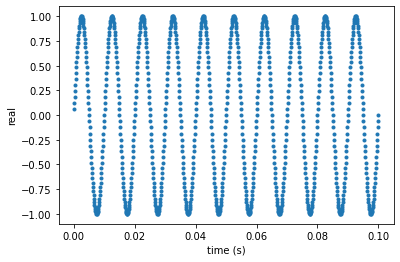

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(theta, s, '.')
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [ ]:
ipd.Audio(s, rate=sr)
# 소리를 들려주는 함수<audio라는 function을 가져온다.>
# 소리로 만들어 주고 싶은 그래프<c or s 등>과sampling rate이 필


## **generate signal by complex-phasor**
### **c = np.exp(theta*j)**

### **theta** ($\theta):np.pi\times\ k$
- k가 2면 sin graph에서 하나의 주기 = $2\pi\$
  
  - = np.sin($2\pi\$) 

- 우선 여기에 몇 번 반복할지를 설정 = **freq**
  - 이것이 **pitch**이다.

- 여기에 **시간을 동기화**
  - sin graph을 점으로 discrete하게 나누는 것 
  - 이 점 하나가 하나의 시간을 반영한다. = **array t**에서는 원소 중 하나
    - sampling frequency = 1000이면 점 하나는 $\frac{1}{1000}$의 시간을 뜻한다. 
    - **array t**에서는 시간이 지나가는 것을 $\frac{x}{1000}$에서 $x$값이 증가하는 것으로 변환

**k = 2 x time array 가 되고  $theta$는 시간의 개념이 들어있는 $radian$값이 된다**

### **np.exp(theta * j)** 
- np.exp(x)함수 = 밑이 $e$인 $y=e^x$으로 변환
- 여기서 j는 허수 $i$다 
  - theta만 입력을 들어간다.나머지는 고정
- 위의 공식을 적용하면 $\cos\theta + \sin\theta\ i$ 값들의 array로 구성된다. 


## graph 
- 시간의 개념이 들어있는 $rad$값 $theta$가 반영된 오일러 공식에서 **변수 $t$**값에 따라 달라지는 $e^{i\theta}$을 실수부분과 허수 부분으로 나눠 추출하면 **3차원 벡터**로 만들어 줄 수 있다.
- 이를 그래프로 표현하면 **x(time, from time array),y($\cos$ = c.real),z($\sin$, c.imag)축**으로 이뤄진 3차원의 그래프를 만들어줄 수 있다.
  - 좌표평면과 복소평면의 결합
- 이 모든 값은 theta값에 종속되어 있기 때문에 전부 -1에서 1사이의 값을 가진다. 

3d 그래프 분석

- time과 imag => sin graph
- time과 real -> cos graph
- real과 imag -> 복소평면상의 단위원 

In [ ]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)

Text(0.5, 0, 'imag')

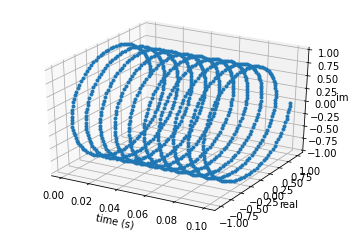

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c.imag, rate=sr)

## phasor_sine
- 위의 과정을 한번에 함수를 통해 실행

In [ ]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp*np.sin(theta)

  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

## phasor_complex
- 위의 과정을 한번에 함수를 통해 실행

In [ ]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp*np.exp(theta*1j)
# 위에서 나눈 처리들을 하나의 function으로 통합해서 실행한다.

  return c, t, theta
# 밑에서는 complex number자체를 return해준다. 
# ipd.Audio에서는 c가 아니라 c.imag sin값, c.real cos값을 사용한다. 

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.real, rate=sr)

# **Generate pulse train(=source)**

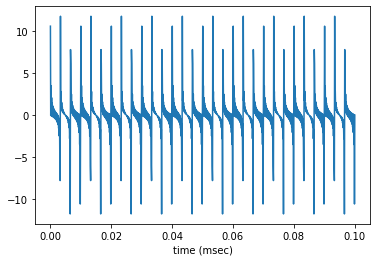

In [ ]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 300
Fend = int(sr/2)
# f0는 가장 낮은 frequency이다. 이에대한 harmonics을 만들어준다. 
# Fend -> 표현하는 제일 마지막 주파수.-> 5000까지가 우리가 표현할 수 있는 가청 주파수이다. 이는 float이기 때문에 range에서 쓰기위해서 int처리

s_all = 0
# 여기서 s값은 가장 초기의 s값이다.-> 그냥 s값을 0으로 정해주는 함수
for freq in range(F0, Fend+1, F0):
  # F0부터 Fend까지 F0의 harmonics(F0의 배음)들로 이뤄진 range 
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s
  # s값을 계속해서 없데이트

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [ ]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [ ]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

Text(0, 0.5, 'amplitude')

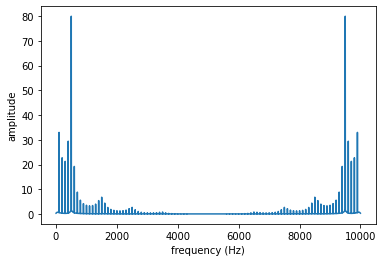

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

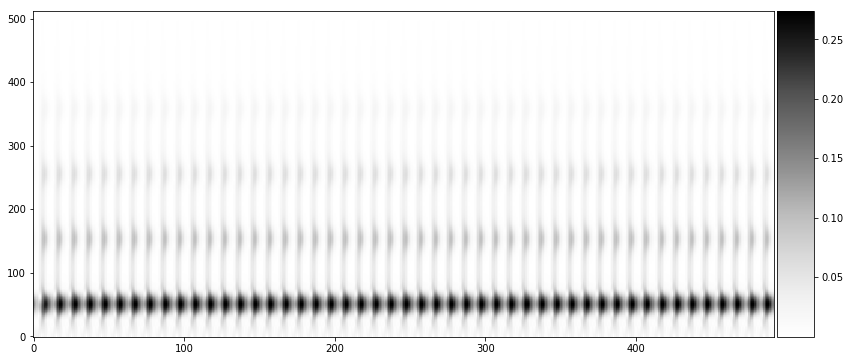

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

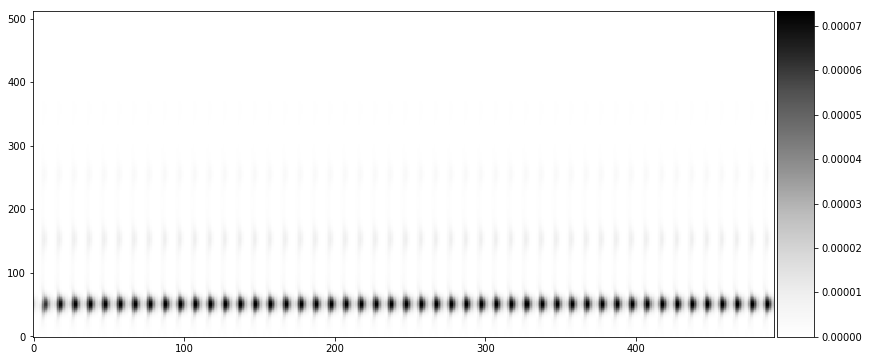

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

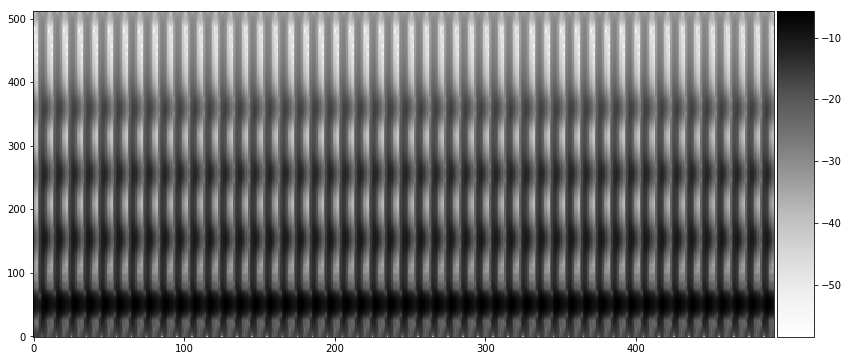

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

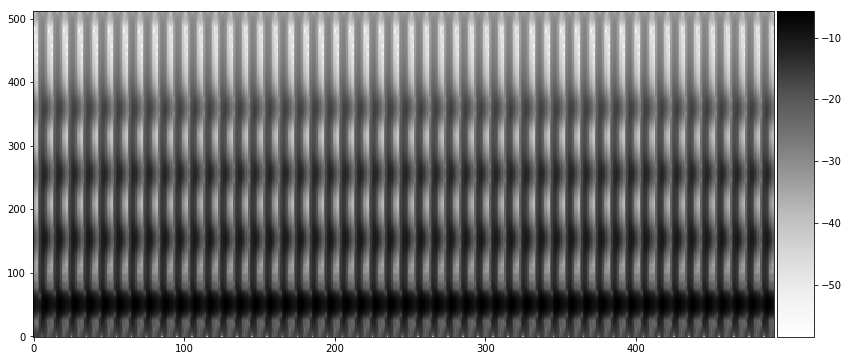

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);